# RNN Minimum Wages Europe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#training data
td = pd.read_csv("currestat.csv")

In [5]:
td.head()

,DATAFLOW,LAST UPDATE,freq,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,1999-S2,45.12,NaN
1,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,2000-S1,46.98,NaN
2,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,2000-S2,52.36,NaN
3,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,2001-S1,52.80,NaN
4,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,2001-S2,60.13,NaN


In [6]:
td.shape

(5349, 8)

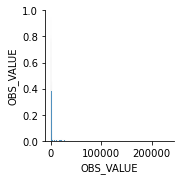

In [7]:
sns.pairplot(td)

In [7]:
td.describe()

,OBS_VALUE
count,3837.000000
mean,2699.689805
std,12927.692364
min,6.850000
25%,364.900000
50%,683.760000
75%,1203.360000
max,232000.000000


In [8]:
td.describe(include=object)

,DATAFLOW,LAST UPDATE,freq,currency,geo,TIME_PERIOD,OBS_FLAG
count,5349,5349,5349,5349,5349,5349,1570
unique,1,1,1,3,37,50,2
top,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,NAC,US,2020-S2,z
freq,5349,5349,5349,1784,150,111,1512


In [9]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5349 entries, 0 to 5348
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     5349 non-null   object 
 1   LAST UPDATE  5349 non-null   object 
 2   freq         5349 non-null   object 
 3   currency     5349 non-null   object 
 4   geo          5349 non-null   object 
 5   TIME_PERIOD  5349 non-null   object 
 6   OBS_VALUE    3837 non-null   float64
 7   OBS_FLAG     1570 non-null   object 
dtypes: float64(1), object(7)
memory usage: 334.4+ KB


In [10]:
td = td.iloc[:,6].values

In [11]:
type(td)

numpy.ndarray

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
td = scaler.fit_transform(td.reshape(-1,1))

In [18]:
x_td = []
y_td = []

Our data shows 48 semesters, therefore we are going to use our 24 semesters to predict 

In [19]:
for i in range(24, len(td)):
    x_td.append(td[i-24:i, 0])
    y_td.append(td[i,0])

In [20]:
x_td = np.array(x_td)
y_td = np.array(y_td)

In [21]:
print(x_td.shape)

print(y_td.shape)

(5325, 24)
(5325,)


In [22]:
x_td = np.reshape(x_td, (x_td.shape[0],
                         x_td.shape[1],
                         1))

In [23]:
print(x_td.shape)

(5325, 24, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [1]:
rnn = Sequential()

NameError: name 'Sequential' is not defined

In [ ]:
rnn.add(LSTM(unit = 45, return_sequences = True, inout_shape = (x_td.shape[1],1)))

In [ ]:
rnn.add(Dropout(0,2))

In [ ]:
rnn.add(LSTM(units = 45, return_sequences =True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45, return_sequences =True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45))
rnn.add(Dropout(0.2))

In [ ]:
rnn.add(Dense(units = 45))

In [ ]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
rnn.fit(x_td, y_td, epochs = 100, batch_size =32)

In [ ]:
testdata = pd.read_csv('')
testdata = testdata.iloc[:,6].values

In [ ]:
print(testdata.shape)

In [ ]:
plt.plot(testdata)

In [ ]:
unscaled_training_data = pd.read_csv('data/FB_training_data.csv')

unscaled_test_data = pd.read_csv('data/FB_test_data.csv')

In [ ]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values

In [ ]:
len(x_test_data)

In [ ]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [ ]:
x_test_data = scaler.transform(x_test_data)

In [ ]:
final_x_test_data = []

for i in range(40, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-40:i, 0])

final_x_test_data = np.array(final_x_test_data)

In [ ]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

In [ ]:
predictions = rnn.predict(final_x_test_data)

In [ ]:
plt.plot(predictions) 

In [ ]:
unscaled_predictions = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions)

In [ ]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")

plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('Facebook Stock Price Predictions')

plt.legend()

In [ ]:
print("The first trading day price prediction is for Jan 2020 is: ",unscaled_predictions[0])
print("The real first trading day price for Jan 2020 is: ",test_data[0])

In [ ]:
print("The last trading day price prediction is for Jan 2020 is: ",unscaled_predictions[20])
print("The real last trading day price for Jan 2020 is: ",test_data[20])